<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ndlib

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 414.edges to 414.edges


In [ ]:
from IPython.display import Image, display
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

In [5]:
filenameFacebook = "414.edges"

graphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)

#Question (a)

##Initial value of "infected" people = 5

In [6]:
# Model selection
model5 = op.SznajdModel(graphFacebook)
config5 = mc.Configuration()
config5.add_model_parameter('fraction_infected', 5/graphFacebook.number_of_nodes())

model5.set_initial_status(config5)
iterations5 = model5.iteration_bunch(100)
trends5 = model5.build_trends(iterations5)

In [7]:
vizDP5 = DiffusionPrevalence(model5, trends5)
vizDP5.plot("prevalence5.png")
vizDT5 = DiffusionTrend(model5, trends5)
vizDT5.plot("diffusion5.png")

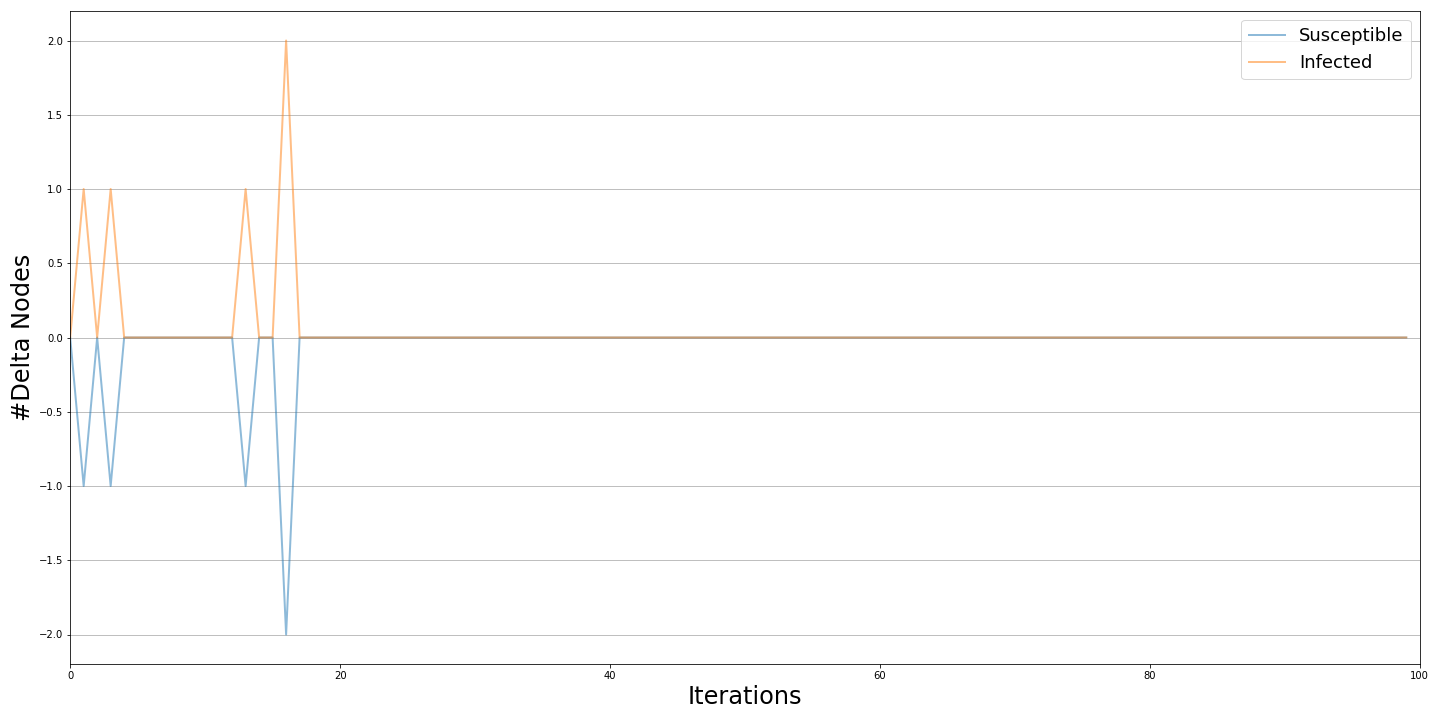

In [8]:
display(Image("prevalence5.png"))

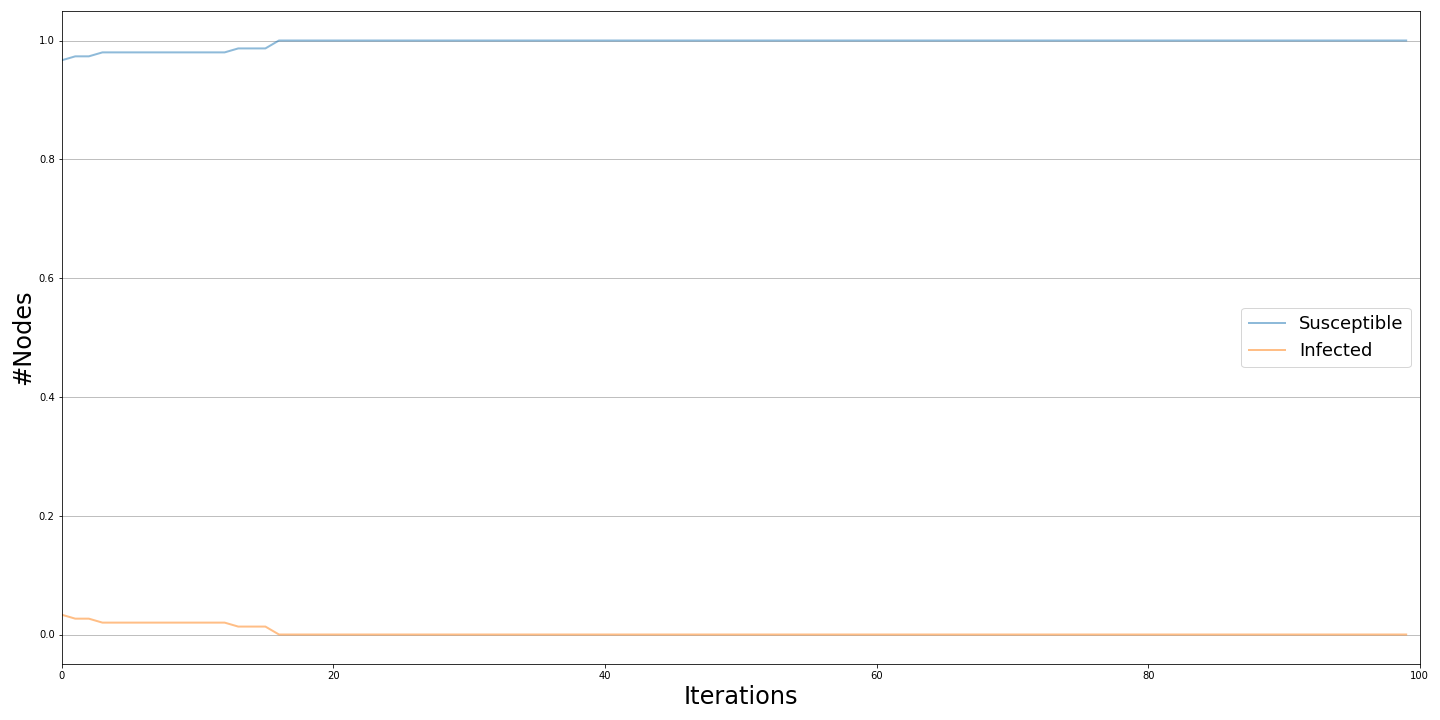

In [9]:
display(Image("diffusion5.png"))

##Initial value of "infected" people = 15


In [10]:
model15 = op.SznajdModel(graphFacebook)
config15 = mc.Configuration()
config15.add_model_parameter('fraction_infected', 15/graphFacebook.number_of_nodes())

model15.set_initial_status(config15)
iterations15 = model15.iteration_bunch(100)
trends15 = model15.build_trends(iterations15)

In [11]:
vizDP15 = DiffusionPrevalence(model15, trends15)
vizDP15.plot("prevalence15.png")
vizDT15 = DiffusionTrend(model15, trends15)
vizDT15.plot("diffusion15.png")

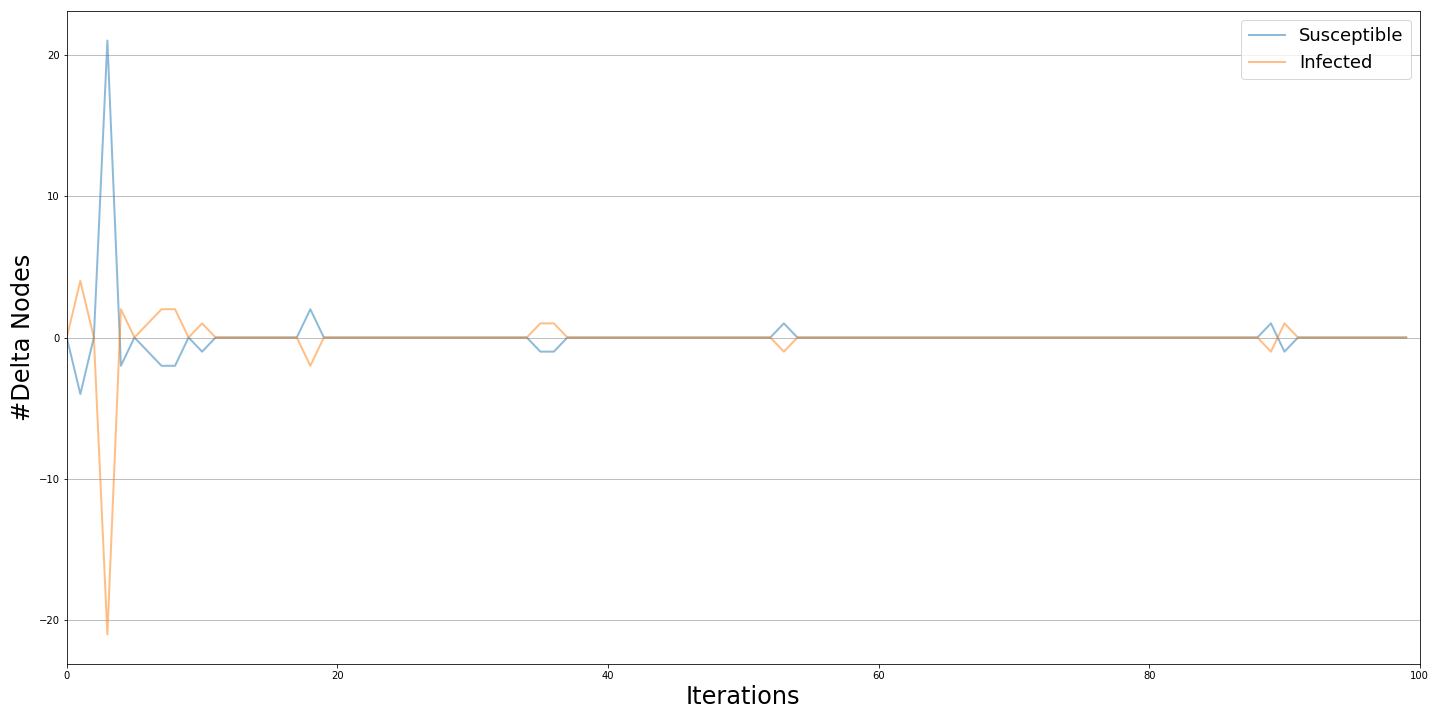

In [12]:
display(Image("prevalence15.png"))

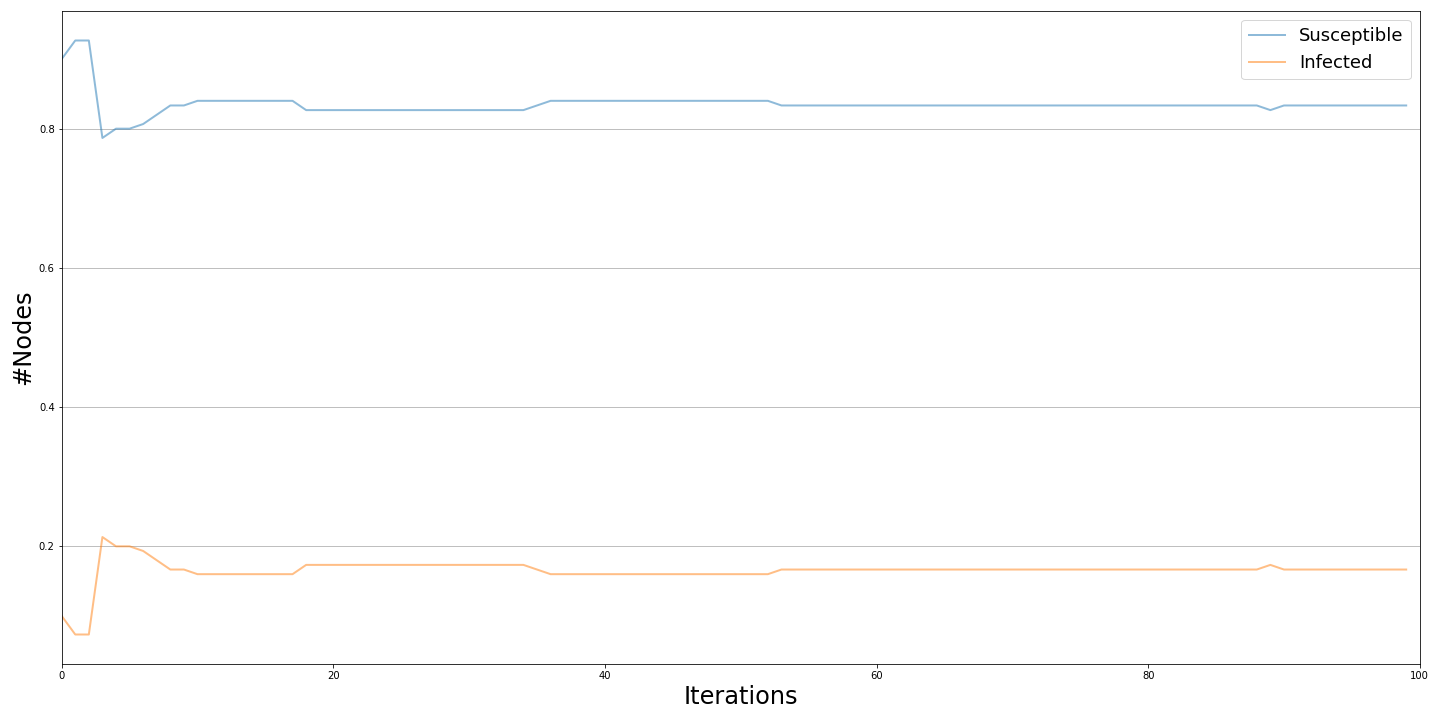

In [13]:
display(Image("diffusion15.png"))

##Initial value of "infected" people = 30

In [14]:
model30 = op.SznajdModel(graphFacebook)
config30 = mc.Configuration()
config30.add_model_parameter('fraction_infected', 30/graphFacebook.number_of_nodes())

model30.set_initial_status(config30)
iterations30 = model30.iteration_bunch(100)
trends30 = model30.build_trends(iterations30)

In [15]:
vizDP30 = DiffusionPrevalence(model30, trends30)
vizDP30.plot("prevalence30.png")
vizDT30 = DiffusionTrend(model30, trends30)
vizDT30.plot("diffusion30.png")

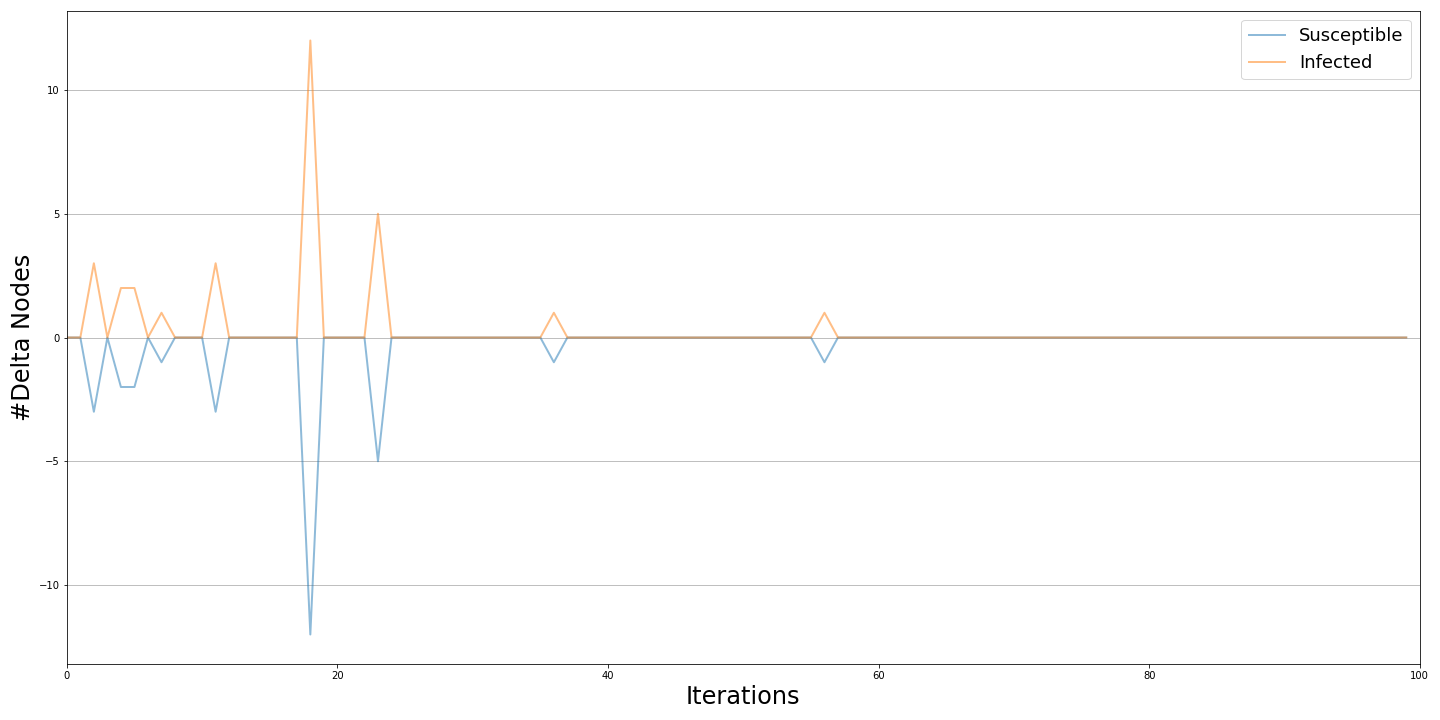

In [16]:
display(Image("prevalence30.png"))

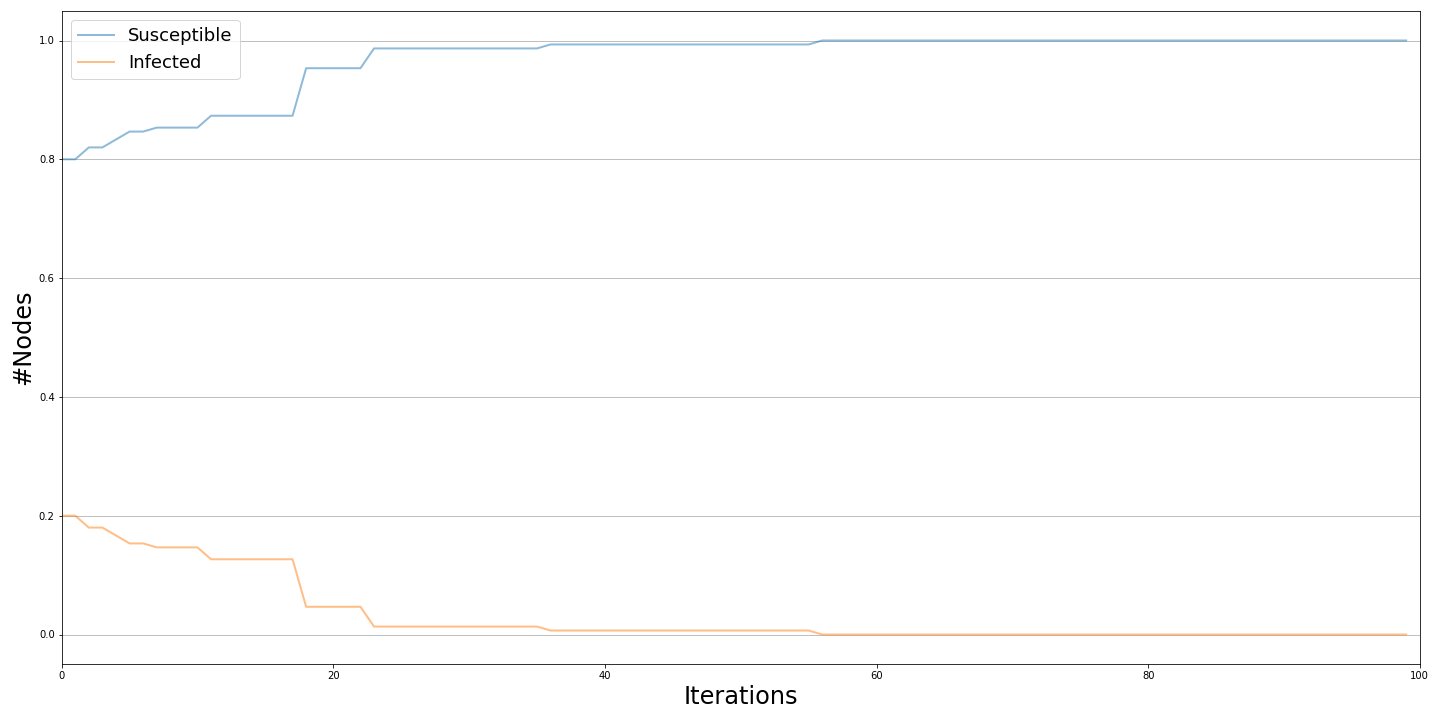

In [17]:
display(Image("diffusion30.png"))

#Question (b)

#infection rate = 0.5 & recovery rate = 0.2

In [18]:
modelSIR1 = ep.SIRModel(graphFacebook)
cfgSIR1 = mc.Configuration()
cfgSIR1.add_model_parameter('beta', 0.5)
cfgSIR1.add_model_parameter('gamma', 0.2)
modelSIR1.set_initial_status(cfgSIR1)

# Simulation execution
iterationsSIR1 = modelSIR1.iteration_bunch(100)
trendsSIR1 = modelSIR1.build_trends(iterationsSIR1)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [19]:
vizDPSIR1 = DiffusionPrevalence(modelSIR1, trendsSIR1)
vizDPSIR1.plot("prevalenceSIR1.png")
vizDTSIR1 = DiffusionTrend(modelSIR1, trendsSIR1)
vizDTSIR1.plot("diffusionSIR1.png")
vizSIR1 = OpinionEvolution(modelSIR1, iterationsSIR1)
vizSIR1.plot("opinionSIR1.png")

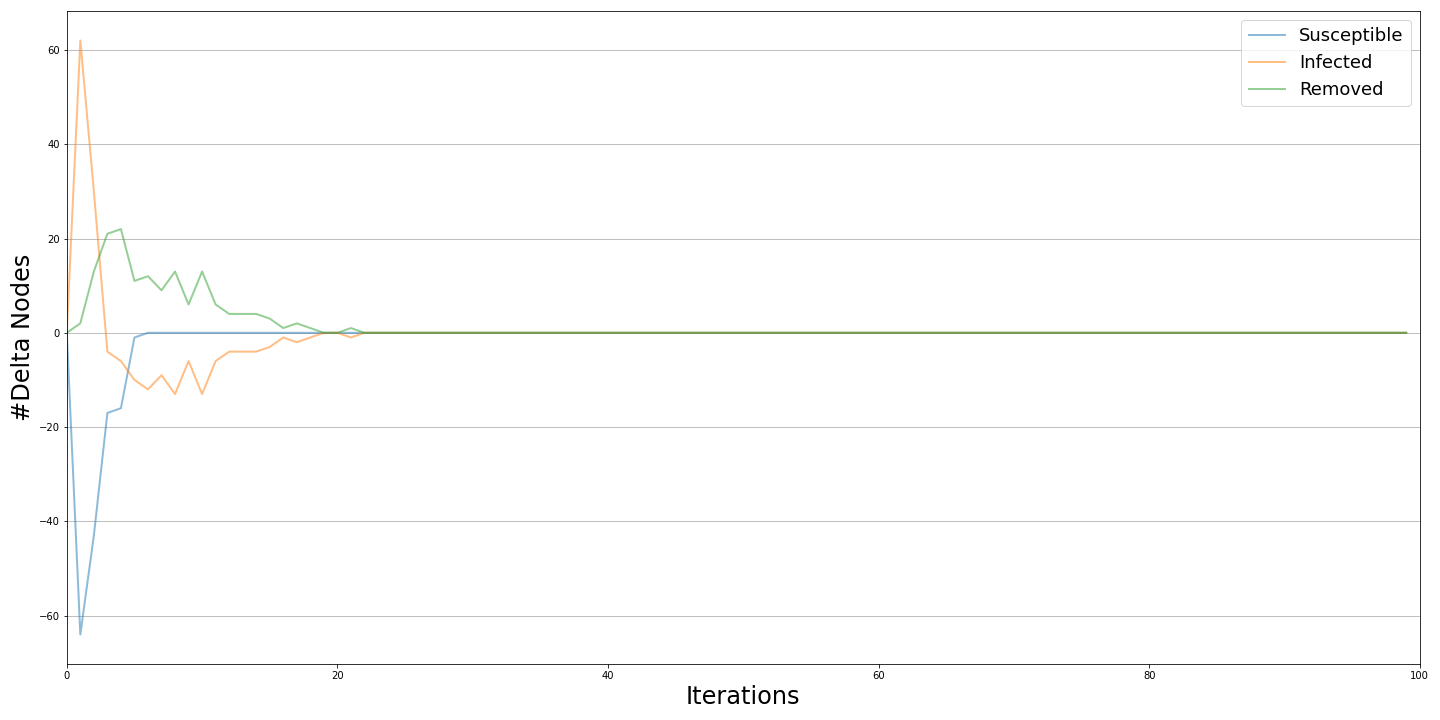

In [20]:
display(Image("prevalenceSIR1.png"))

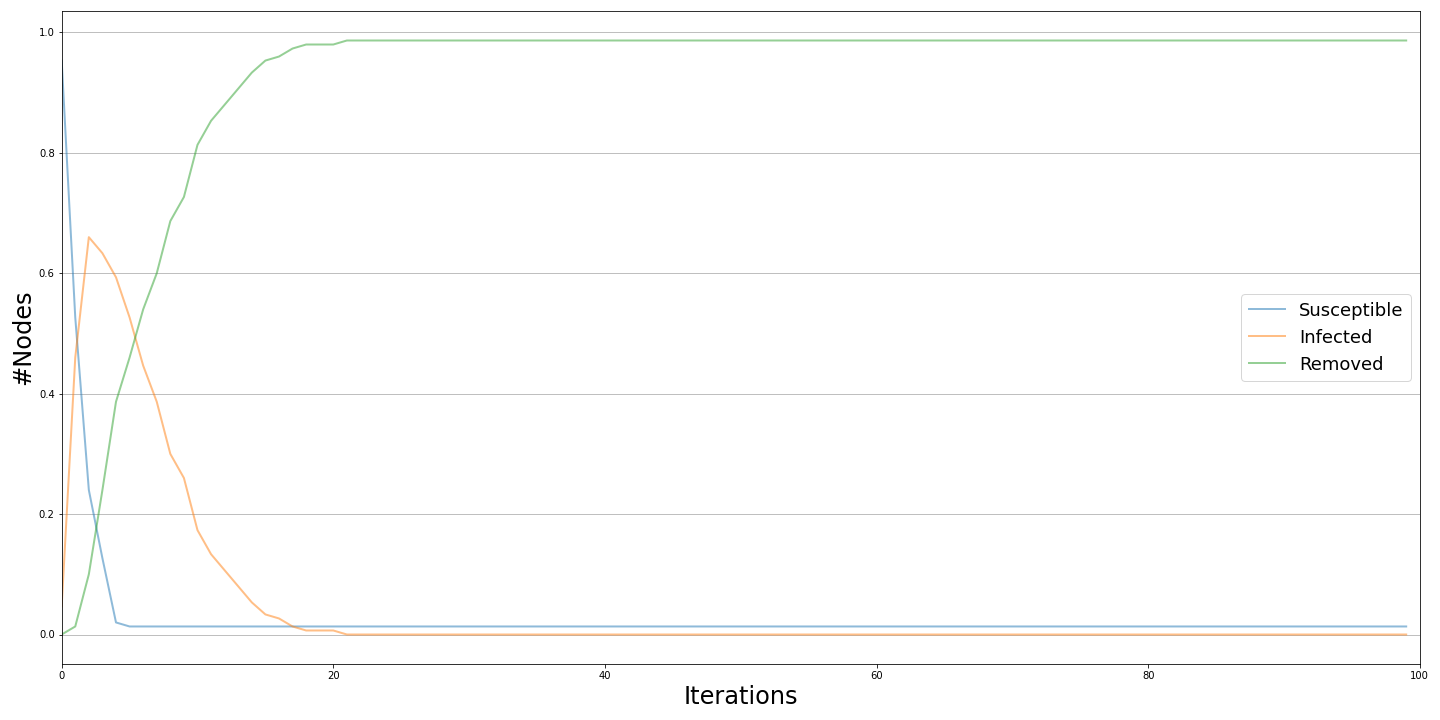

In [21]:
display(Image("diffusionSIR1.png"))

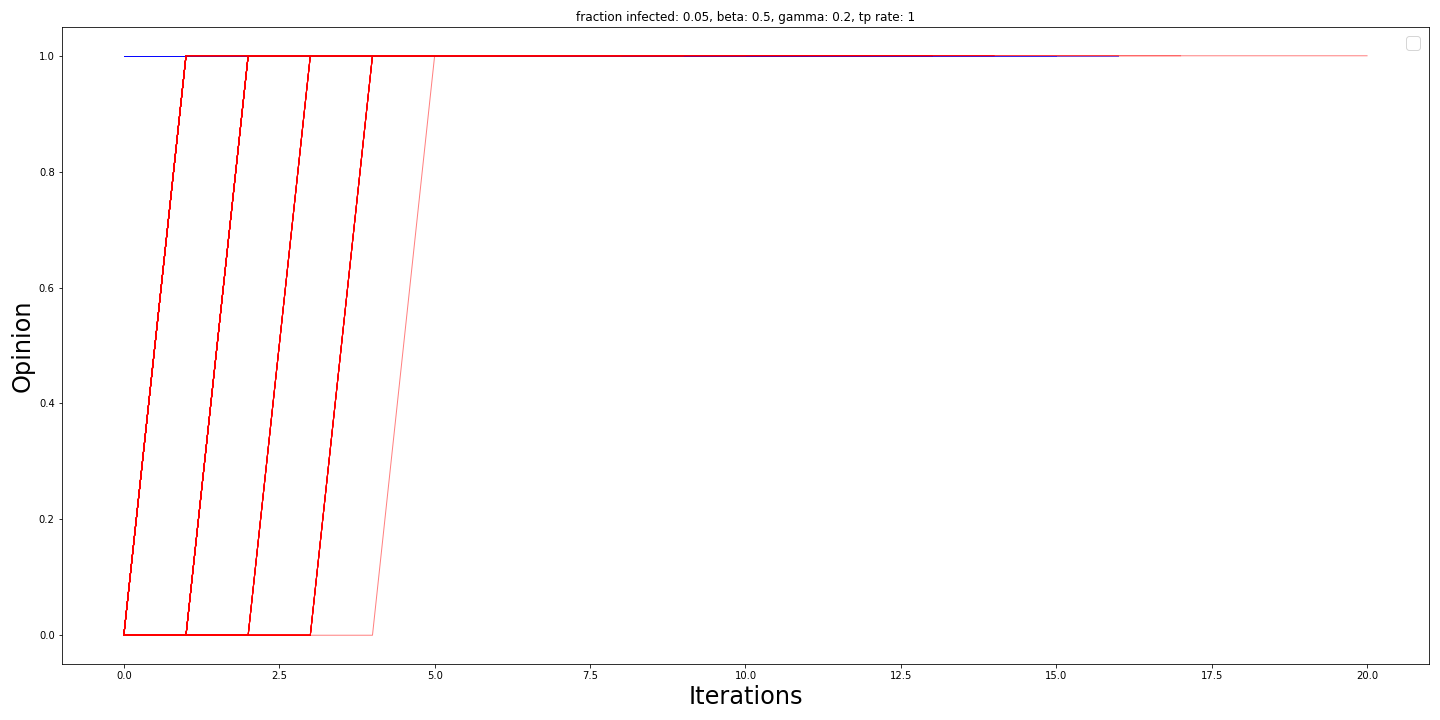

In [22]:
display(Image("opinionSIR1.png"))

#infection rate = 0.3 & recovery rate = 0.3

In [23]:
modelSIR2 = ep.SIRModel(graphFacebook)
cfgSIR2 = mc.Configuration()
cfgSIR2.add_model_parameter('beta', 0.3)
cfgSIR2.add_model_parameter('gamma', 0.3)
modelSIR2.set_initial_status(cfgSIR2)

# Simulation execution
iterationsSIR2 = modelSIR2.iteration_bunch(100)
trendsSIR2 = modelSIR2.build_trends(iterationsSIR2)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [24]:
vizDPSIR2 = DiffusionPrevalence(modelSIR2, trendsSIR2)
vizDPSIR2.plot("prevalenceSIR2.png")
vizDTSIR2 = DiffusionTrend(modelSIR2, trendsSIR2)
vizDTSIR2.plot("diffusionSIR2.png")
vizSIR2 = OpinionEvolution(modelSIR2, iterationsSIR2)
vizSIR2.plot("opinionSIR2.png")

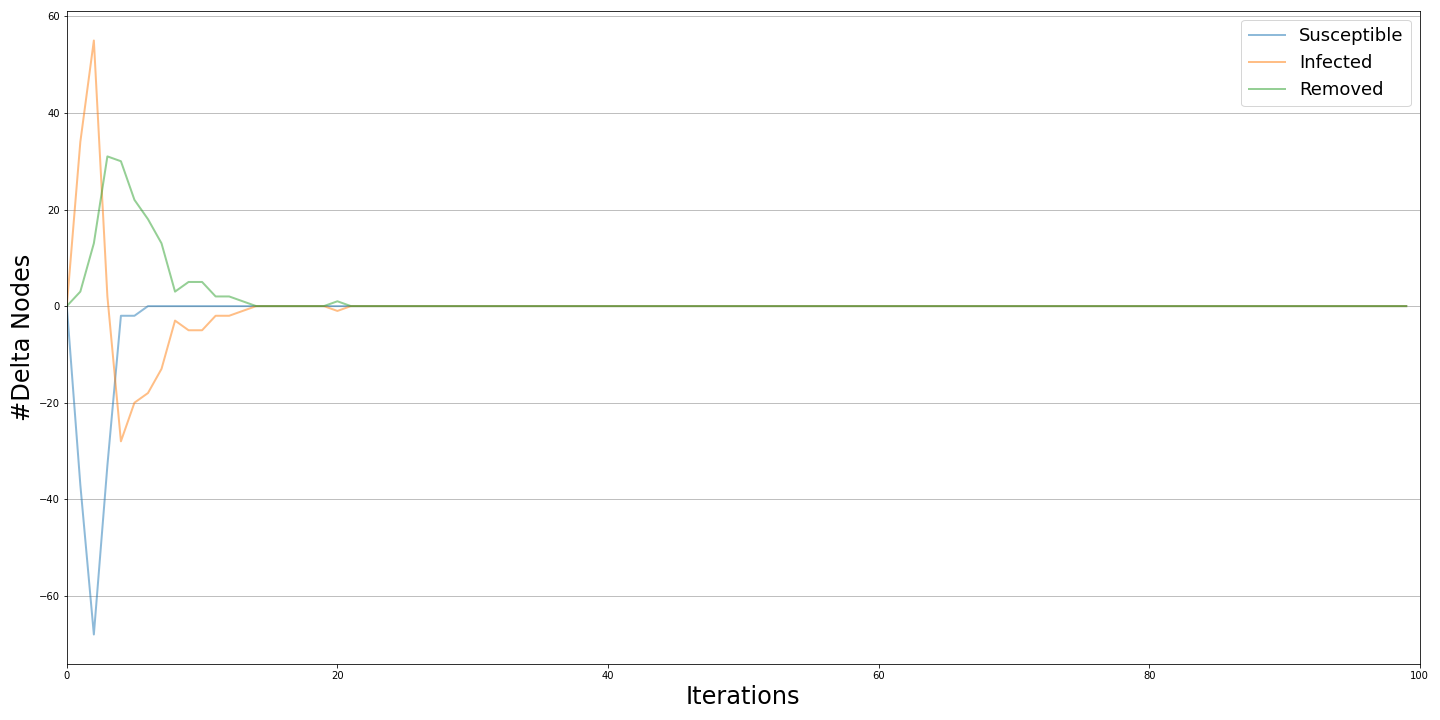

In [25]:
display(Image("prevalenceSIR2.png"))

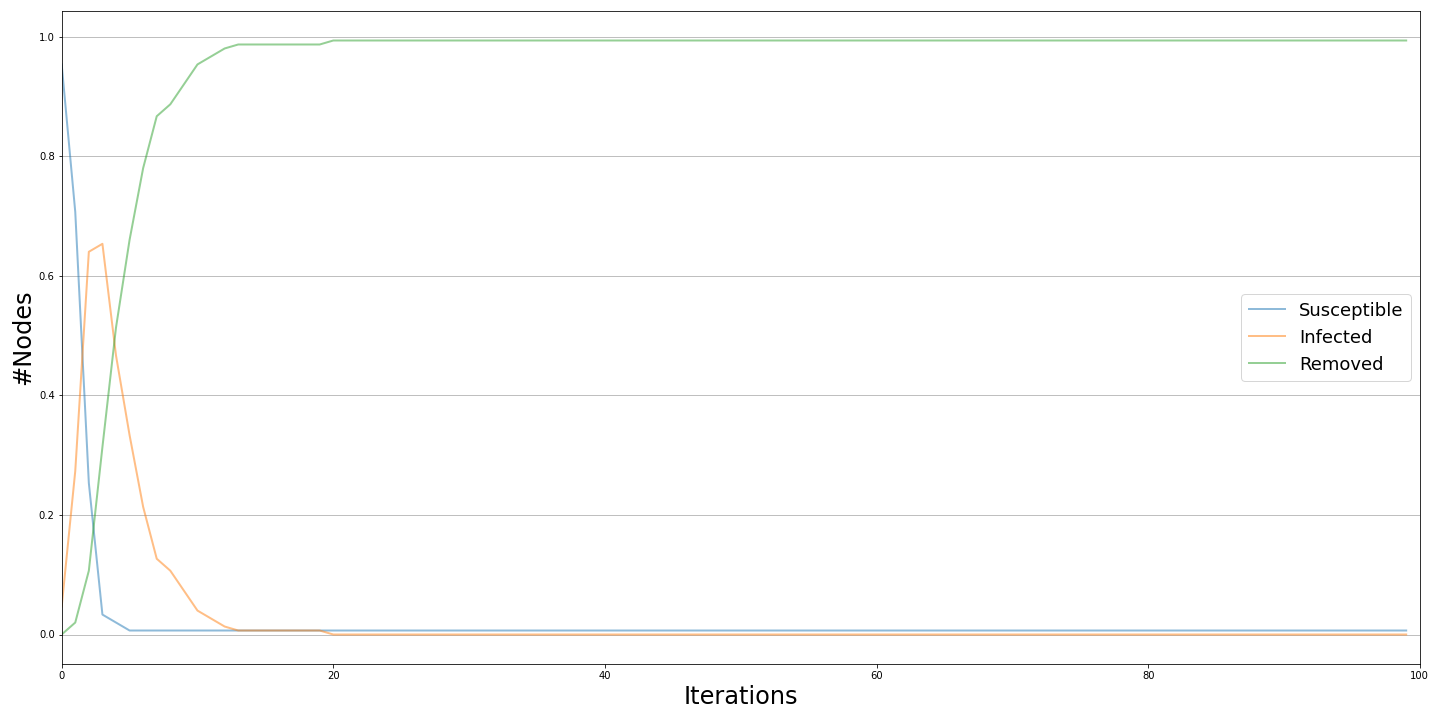

In [26]:
display(Image("diffusionSIR2.png"))

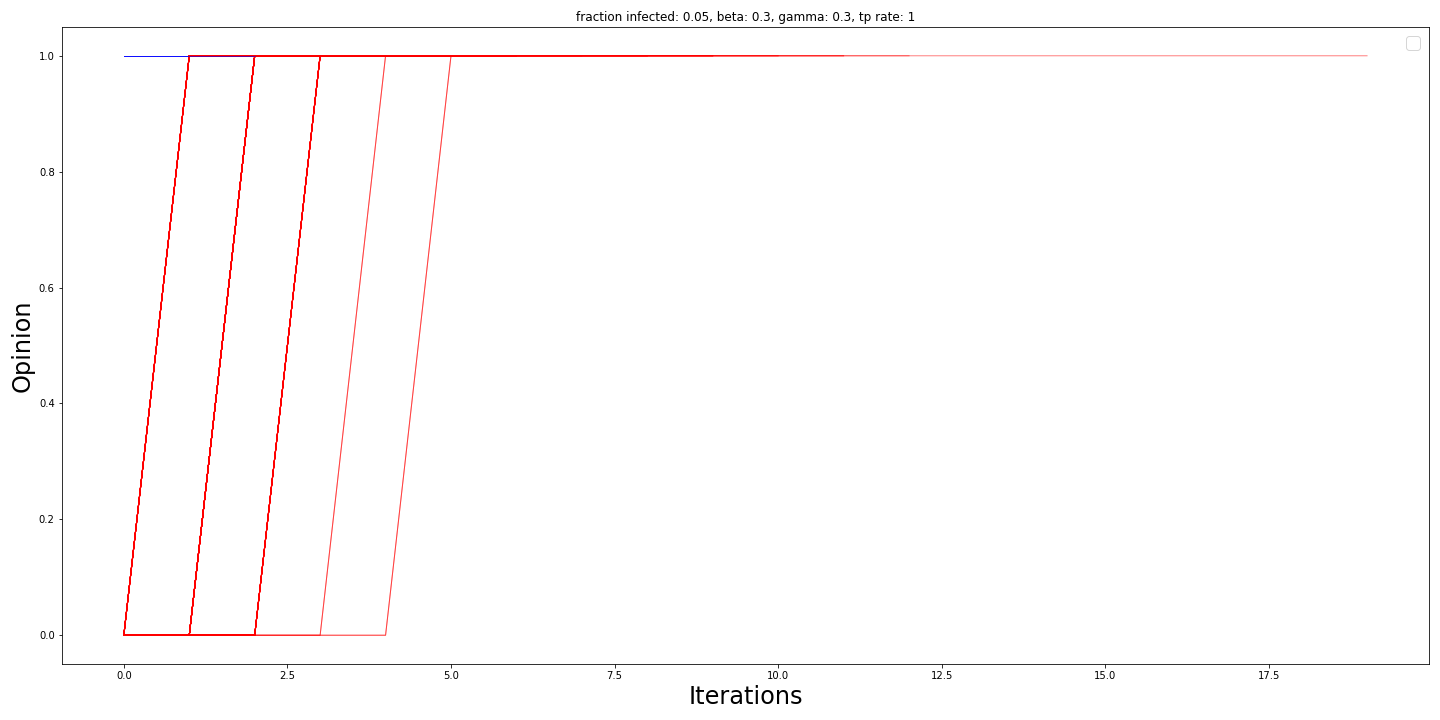

In [27]:
display(Image("opinionSIR2.png"))

#infection rate = 0.4 & recovery rate = 0.5

In [28]:
modelSIR3 = ep.SIRModel(graphFacebook)
cfgSIR3 = mc.Configuration()
cfgSIR3.add_model_parameter('beta', 0.4)
cfgSIR3.add_model_parameter('gamma', 0.5)
modelSIR3.set_initial_status(cfgSIR3)

# Simulation execution
iterationsSIR3 = modelSIR3.iteration_bunch(100)
trendsSIR3 = modelSIR3.build_trends(iterationsSIR3)

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [29]:
vizDPSIR3 = DiffusionPrevalence(modelSIR3, trendsSIR3)
vizDPSIR3.plot("prevalenceSIR3.png")
vizDTSIR3 = DiffusionTrend(modelSIR3, trendsSIR3)
vizDTSIR3.plot("diffusionSIR3.png")
vizSIR3 = OpinionEvolution(modelSIR3, iterationsSIR3)
vizSIR3.plot("opinionSIR3.png")

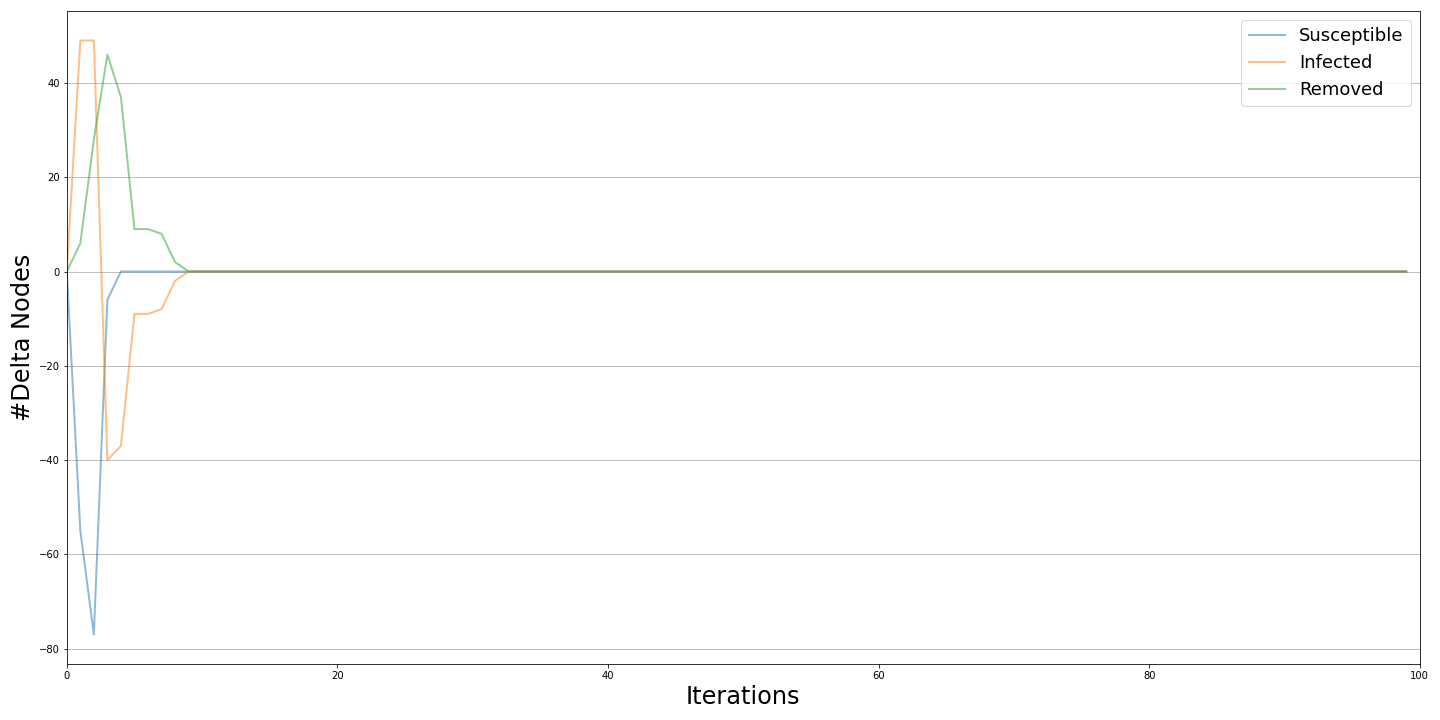

In [30]:
display(Image("prevalenceSIR3.png"))

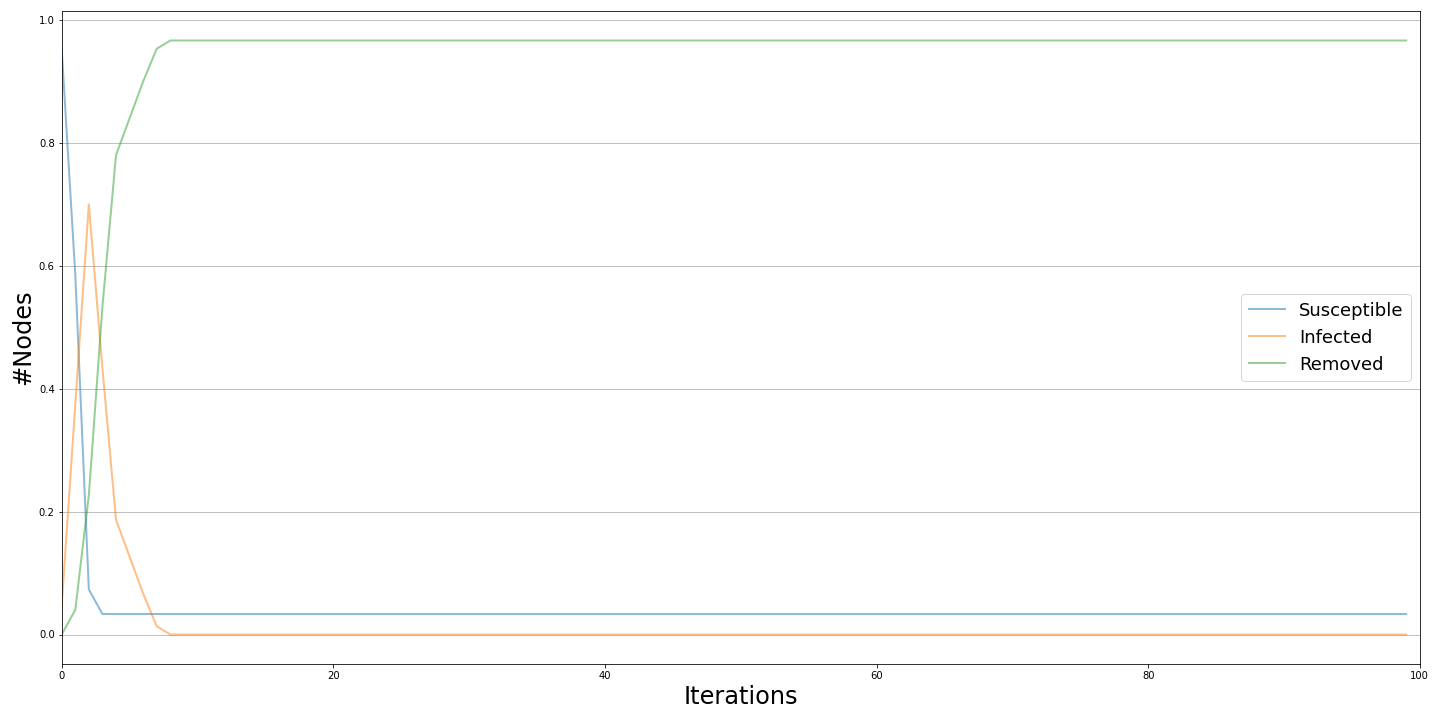

In [31]:
display(Image("diffusionSIR3.png"))

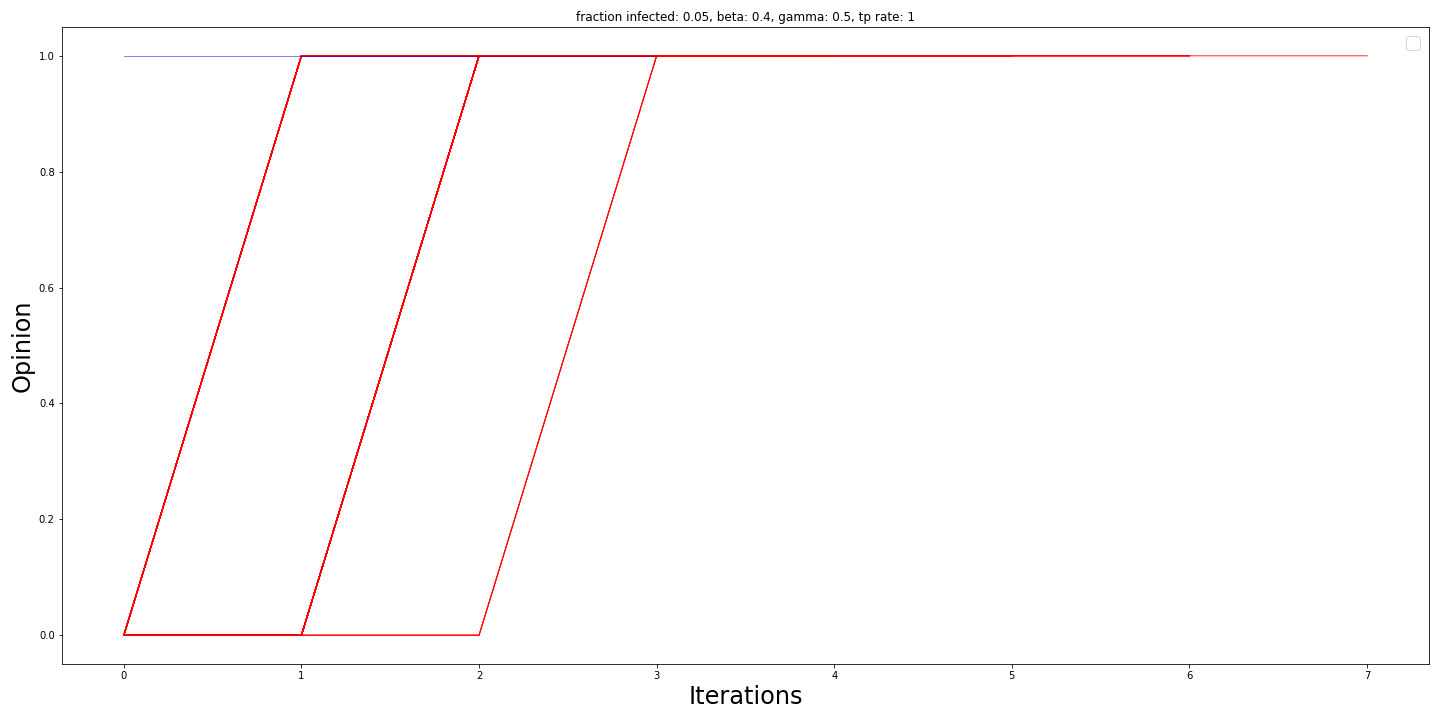

In [32]:
display(Image("opinionSIR3.png"))